# Prediction using Unsupervised ML(Level Beginner)

### Author:- Nachiket Kumbhare

#### Task 2:- Predict the optimum number of cluster and represent it visually.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


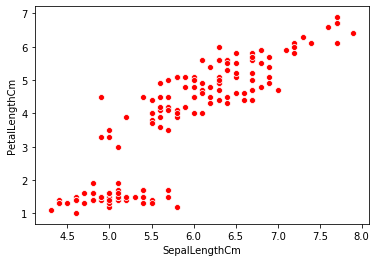

In [4]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalLengthCm'],color='red')

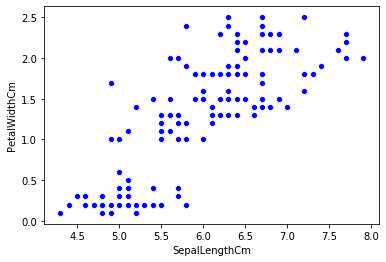

In [5]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalWidthCm'],color='blue')

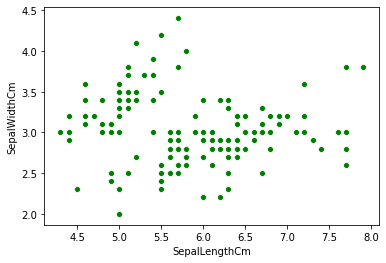

In [6]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],color='green')

In [7]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

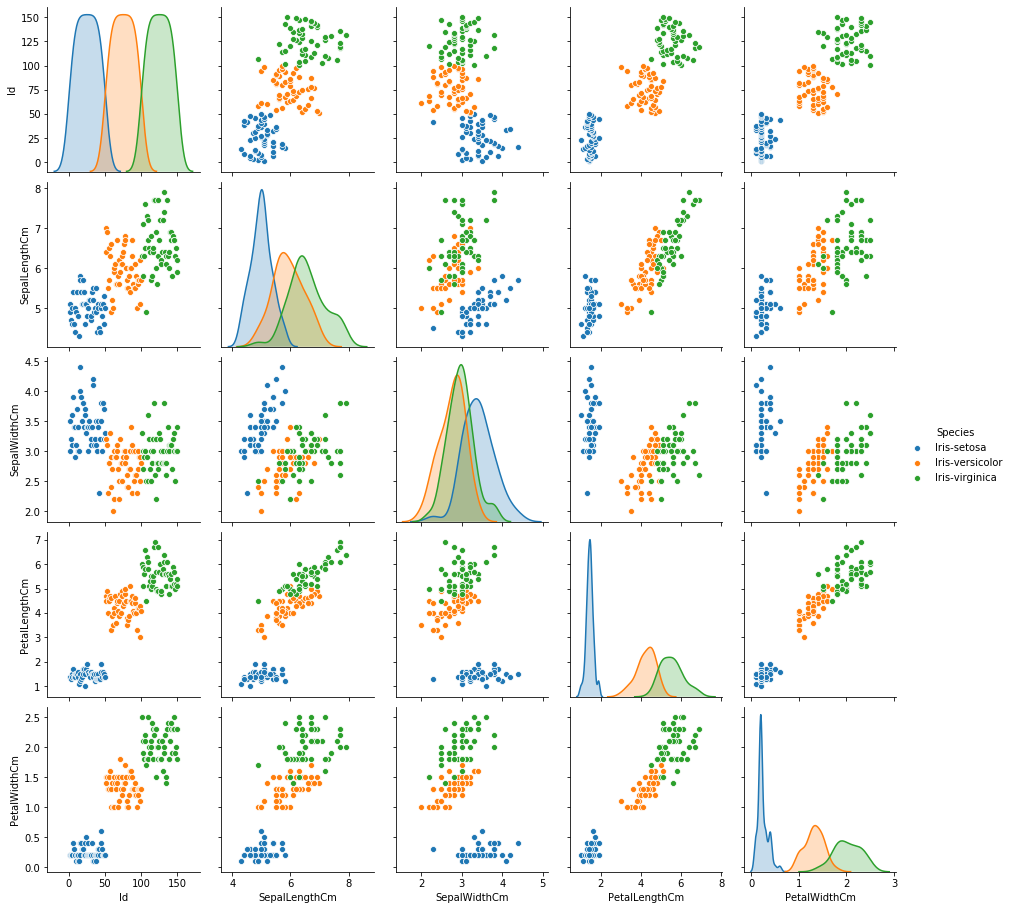

In [8]:
sns.pairplot(df,hue='Species')

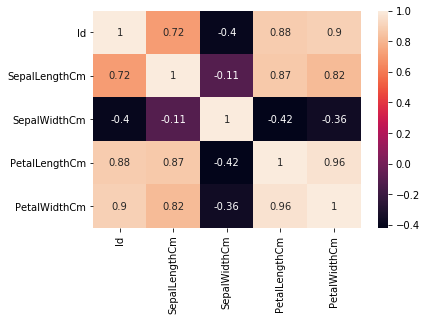

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
from sklearn.cluster import KMeans

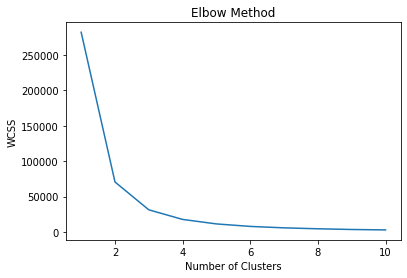

In [11]:
# Finding the number of clusters for kmeans classification
X = df.iloc[:,[0,1,2,3]].values
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
# plot the results of the line graph
plt.plot(range(1,11),WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
sns.set(rc={'figure.figsize':(5,5)})

In [12]:
# Applying kmeans to the dataset, creating the kmeans classifier
kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans =kmeans.fit_predict(X)
y_kmeans

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

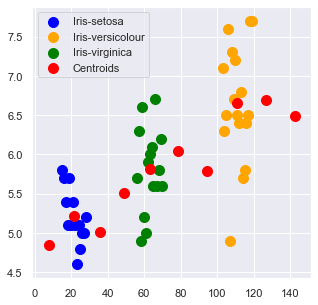

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
sns.set(rc={'figure.figsize':(15,15)})

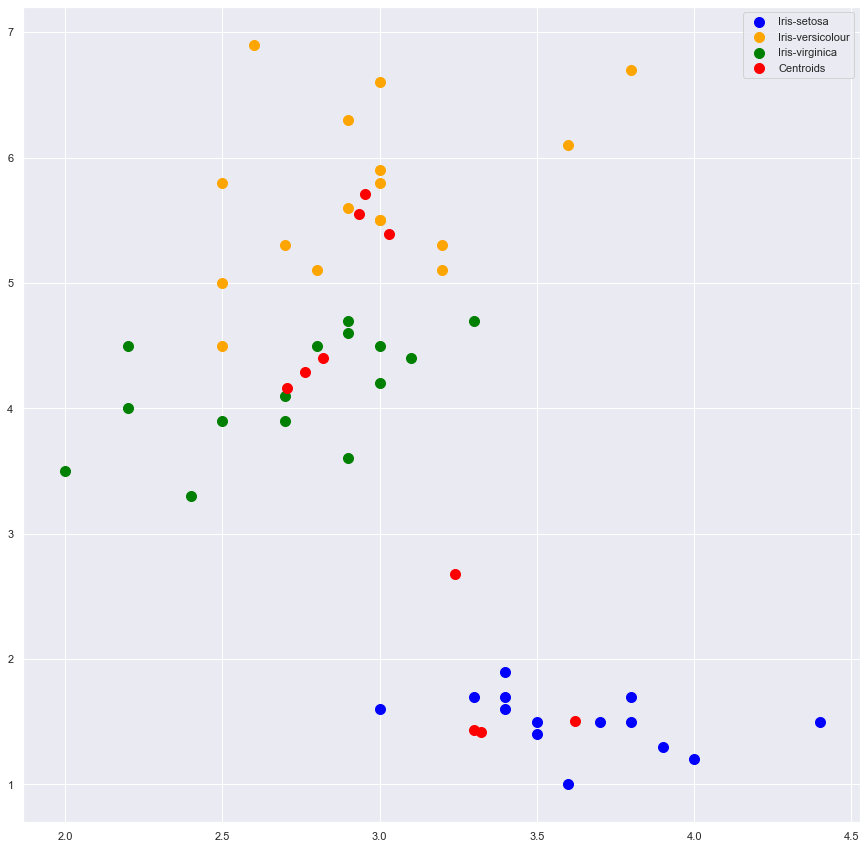

In [14]:
# Visualising the clusters - On the third and fourth columns
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.legend()
sns.set(rc={'figure.figsize':(5,5)})

# Thank You!